<a href="https://colab.research.google.com/github/hamzathekhan/Deep-Learning-Content/blob/main/House_Price_Prediction_and_Serielization_using_joblib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
house = pd.read_csv("/content/House Price Prediction Dataset.csv")
house["Garage"] = house["Garage"].replace(["Yes","No"],[1,0])
house["Condition"] = house["Condition"].replace(["Poor","Fair","Good","Excellent"],[0,1,2,3])
house.info()

In [51]:
house.drop(["Id","Location"],axis=1,inplace=True)

In [55]:
# Visualizing data
corr_matrix = house.corr()
corr_matrix["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Floors,0.055890
YearBuilt,0.004845
Garage,0.002842
Area,0.001542
Bedrooms,-0.003471
Condition,-0.010576
Bathrooms,-0.015737


<Axes: xlabel='Area', ylabel='Price'>

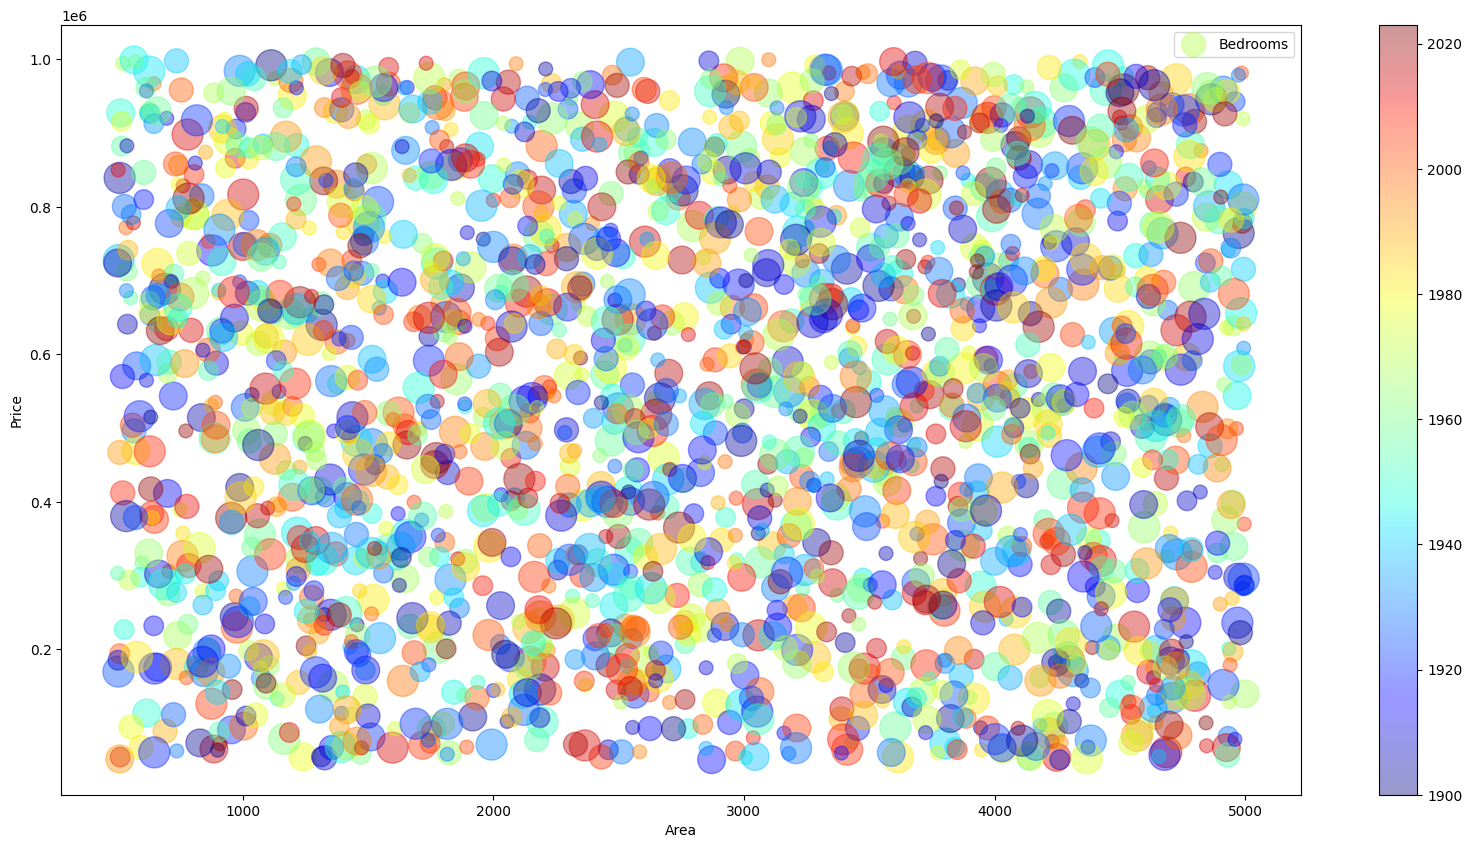

In [69]:
house.plot(kind="scatter",x="Area",y="Price",alpha=0.4,figsize=(20,10),
           s=house["Bedrooms"]*100,label="Bedrooms",
           c=house['YearBuilt'],cmap=plt.get_cmap("jet"))

array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='Floors', ylabel='Area'>,
        <Axes: xlabel='Bedrooms', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Price'>,
        <Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Floors', ylabel='Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Price'>],
       [<Axes: xlabel='Area', ylabel='Floors'>,
        <Axes: xlabel='Price', ylabel='Floors'>,
        <Axes: xlabel='Floors', ylabel='Floors'>,
        <Axes: xlabel='Bedrooms', ylabel='Floors'>],
       [<Axes: xlabel='Area', ylabel='Bedrooms'>,
        <Axes: xlabel='Price', ylabel='Bedrooms'>,
        <Axes: xlabel='Floors', ylabel='Bedrooms'>,
        <Axes: xlabel='Bedrooms', ylabel='Bedrooms'>]], dtype=object)

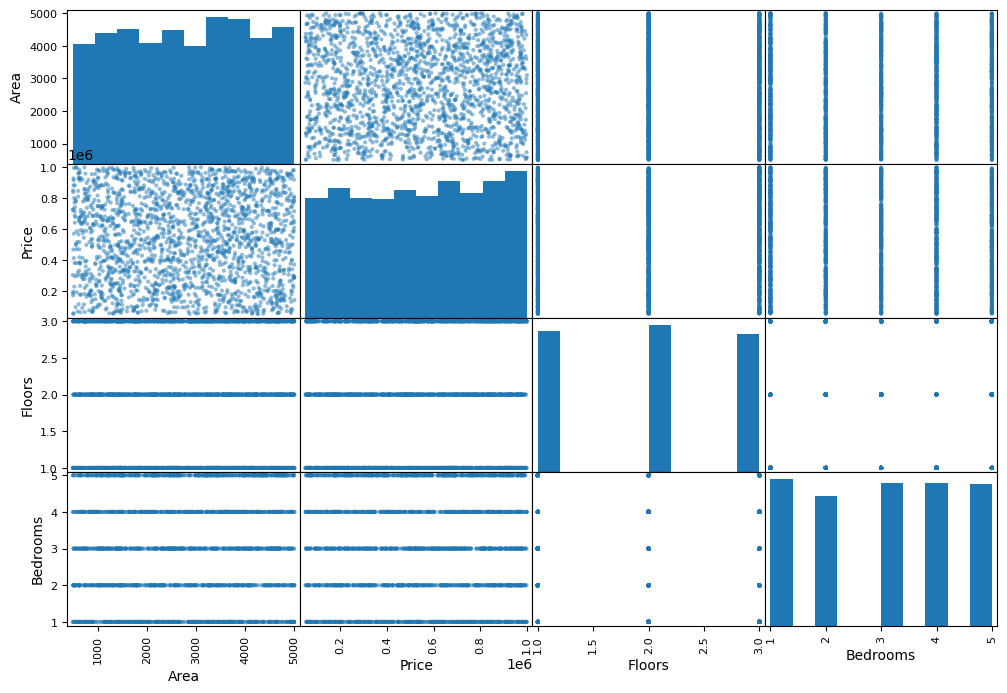

In [73]:
## Finding Corr using pandas.plotting.scatter_matrix
from pandas.plotting import scatter_matrix

scatter_matrix(house[["Area","Price","Floors","Bedrooms"]],figsize=(12,8))

In [74]:
# Spliting into Trian and test data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house,house["Bedrooms"]):
  strat_train_set = house.loc[train_index]
  strat_test_set = house.loc[test_index]

In [75]:
# Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(strat_train_set.drop("Price",axis=1),strat_train_set["Price"])

LinearRegression()

In [76]:
model.coef_

array([-4.04185282e-01,  5.59198438e+02, -6.45925810e+03,  2.12744585e+04,
        8.10743928e+00, -1.48989605e+03, -1.91258370e+03])

In [77]:
model.intercept_

499519.9202631558

In [78]:
model.score(strat_test_set.drop("Price",axis=1),strat_test_set["Price"])

-0.0014693309184525827

In [79]:
strat_test_set.head(10)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price
938,2565,2,4,3,2014,2,1,513002
1046,648,4,3,2,2005,0,0,375969
707,1960,2,1,1,1967,0,1,514736
476,1865,2,4,2,1930,2,1,255719
721,1563,4,2,3,1915,0,0,961848
1021,2589,1,2,2,1924,3,0,866460
480,4812,3,2,1,1928,3,0,166196
533,3331,5,1,1,1930,3,1,985510
1538,2546,3,4,1,2015,1,0,146453
1213,2609,2,4,1,1911,1,1,658841


In [82]:
model.predict([[2609,2,4,1,1911,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([507112.06053884])

In [83]:
import joblib
joblib.dump(model,"house_price_prediction_model_joblib")

['house_price_prediction_model_joblib']

In [84]:
mj = joblib.load("house_price_prediction_model_joblib")